<a href="https://colab.research.google.com/github/heroideallstar/data/blob/main/SAPR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de mercado da ação SAPR4
A Companhia de Saneamento Parana SANEPARpossui capital de investimento na bolsa, desta forma será realizado uma análise e uma tentativa de predição sobre o preço das açoes futuras utilizando aprendizado de maquina.

**Isto é um estudo e não algo a se basear**


In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prophet import Prophet

In [ ]:
dados = yf.download('SAPR4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dados

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,3.49,3.49,3.38,3.45,3.236170,3507700
2023-01-03,3.46,3.48,3.36,3.38,3.170509,4272500
2023-01-04,3.40,3.43,3.36,3.40,3.189269,3392500
2023-01-05,3.42,3.43,3.38,3.43,3.217410,2050100
2023-01-06,3.44,3.46,3.41,3.43,3.217410,1805900
...,...,...,...,...,...,...
2023-12-21,5.85,5.92,5.82,5.85,5.725615,2021900
2023-12-22,5.85,5.90,5.82,5.86,5.735402,2083200
2023-12-26,5.87,5.90,5.79,5.79,5.666890,1878100


## Análise do ano de 2023

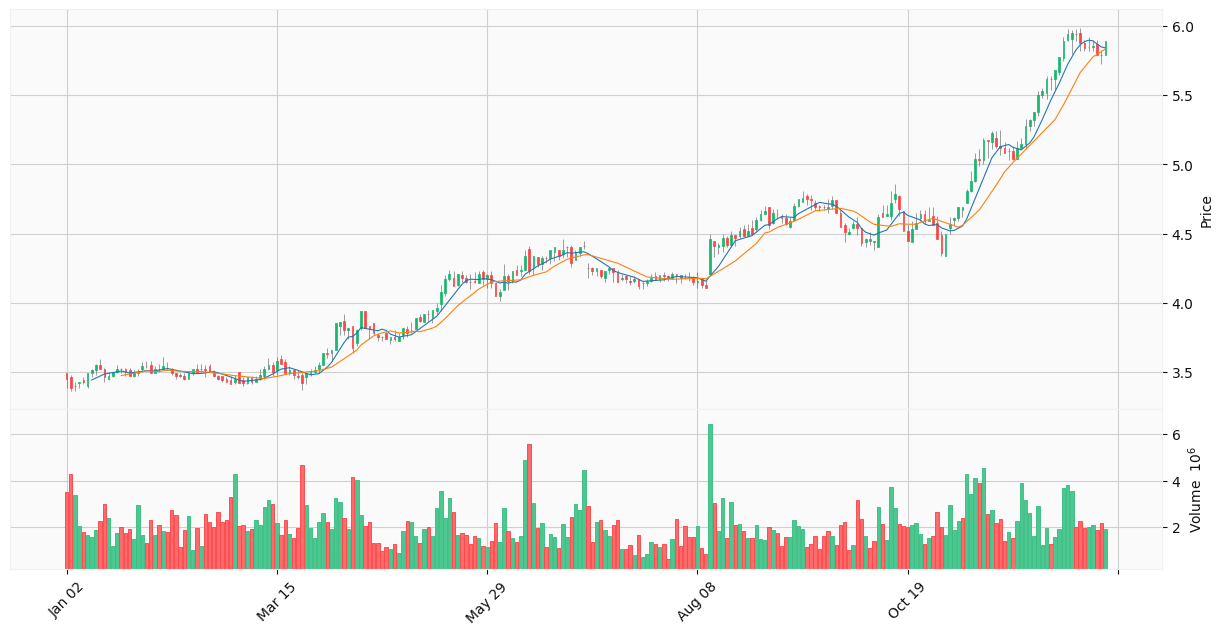

In [ ]:
mpf.plot(dados.head(248), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')

## Análise do ultimo semestre

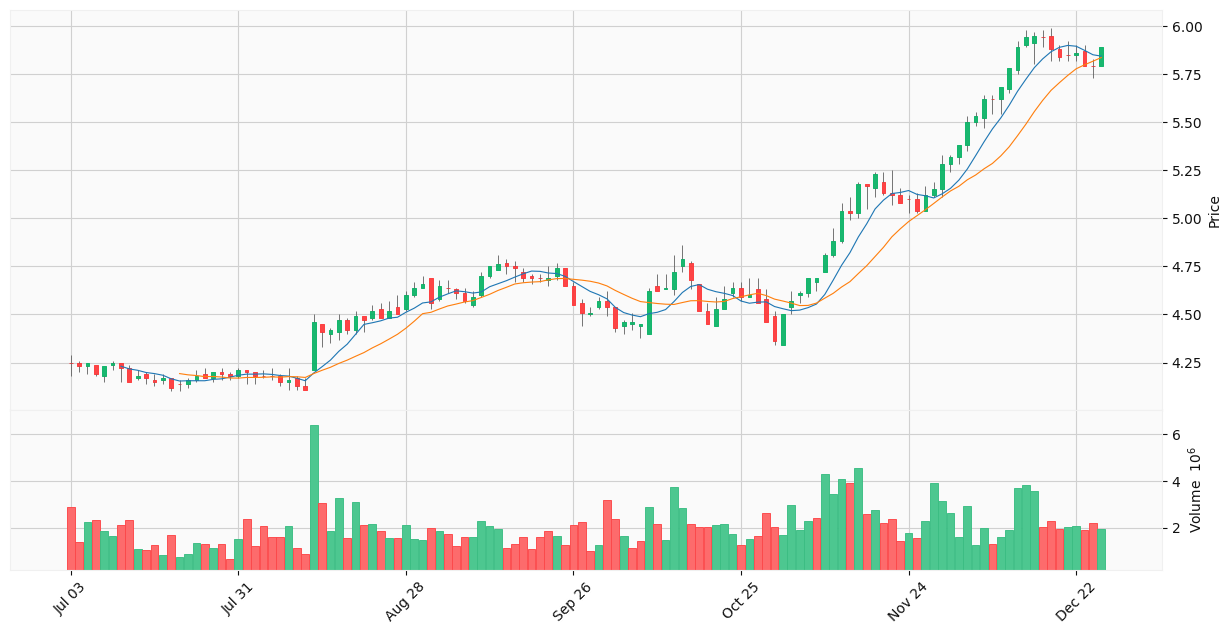

In [ ]:
mpf.plot(dados.tail(124), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')

## Tentativa de predição usando o Prophet


In [ ]:
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,3.49,3.49,3.38,3.45,3.236170,3507700
1,2023-01-03,3.46,3.48,3.36,3.38,3.170509,4272500
2,2023-01-04,3.40,3.43,3.36,3.40,3.189269,3392500
3,2023-01-05,3.42,3.43,3.38,3.43,3.217410,2050100
4,2023-01-06,3.44,3.46,3.41,3.43,3.217410,1805900
...,...,...,...,...,...,...,...
243,2023-12-21,5.85,5.92,5.82,5.85,5.725615,2021900
244,2023-12-22,5.85,5.90,5.82,5.86,5.735402,2083200
245,2023-12-26,5.87,5.90,5.79,5.79,5.666890,1878100
246,2023-12-27,5.79,5.83,5.73,5.79,5.666890,2178000


In [ ]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [ ]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='BR')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp26ndoos3/v88dik_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp26ndoos3/g2rq31h1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40201', 'data', 'file=/tmp/tmp26ndoos3/v88dik_7.json', 'init=/tmp/tmp26ndoos3/g2rq31h1.json', 'output', 'file=/tmp/tmp26ndoos3/prophet_modelov5wkcft/prophet_model-20240329172509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:25:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:25:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

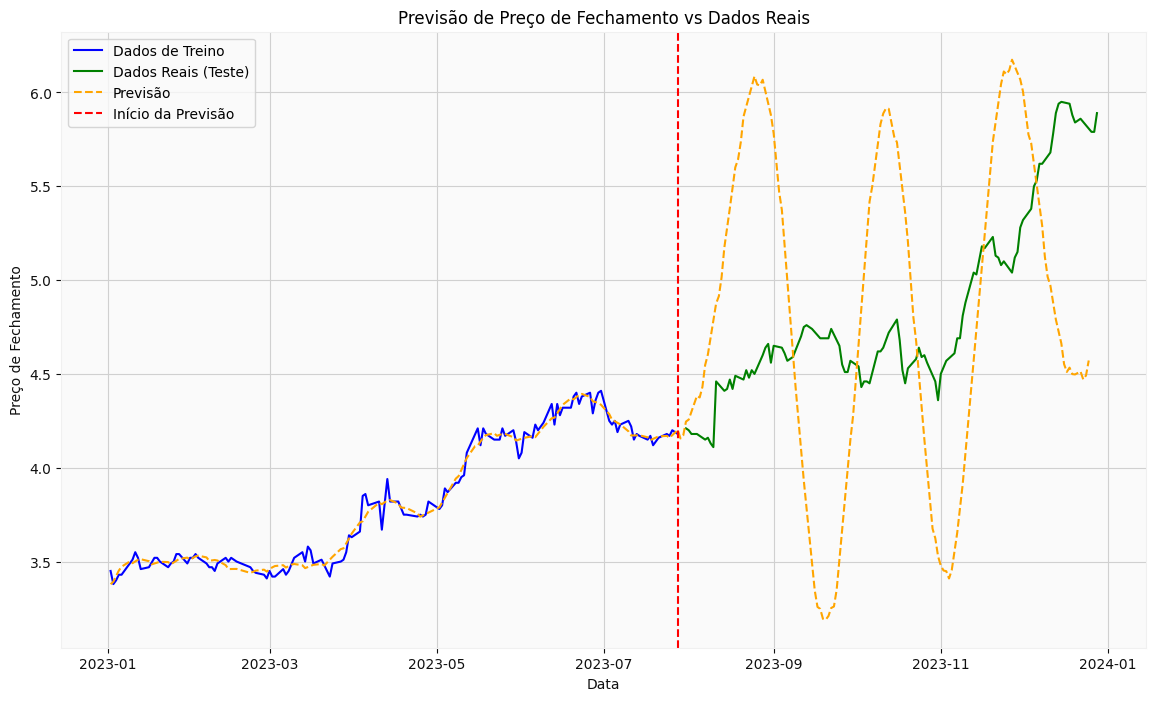

In [ ]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

## Novo Teste

In [ ]:
# Baixar dados dos últimos quatro anos para uma ação específica
dados = yf.download("SAPR4.SA", start="2020-01-01", end="2024-03-28", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,6.956666,7.000000,6.816666,6.816666,5.355275,2757300
1,2020-01-03,6.783333,6.816666,6.333333,6.333333,4.975561,26943900
2,2020-01-06,6.433333,6.450000,6.280000,6.343333,4.983417,10079100
3,2020-01-07,6.410000,6.493333,6.346666,6.493333,5.101260,3516600
4,2020-01-08,6.500000,6.533333,6.400000,6.490000,5.098642,2796600
...,...,...,...,...,...,...,...
1048,2024-03-21,5.320000,5.320000,5.220000,5.270000,5.270000,1616000
1049,2024-03-22,5.300000,5.300000,5.190000,5.230000,5.230000,1098400
1050,2024-03-25,5.240000,5.300000,5.210000,5.290000,5.290000,1848600
1051,2024-03-26,5.250000,5.320000,5.230000,5.230000,5.230000,1246000


In [ ]:
dados_treino = dados[dados['Date'] < '2024-01-01']
dados_teste = dados[dados['Date'] >= '2024-01-01']

In [ ]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='BR')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp26ndoos3/z35t29mt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp26ndoos3/lzk0hfi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22213', 'data', 'file=/tmp/tmp26ndoos3/z35t29mt.json', 'init=/tmp/tmp26ndoos3/lzk0hfi1.json', 'output', 'file=/tmp/tmp26ndoos3/prophet_modelc40fxz1a/prophet_model-20240329173017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:30:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:30:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

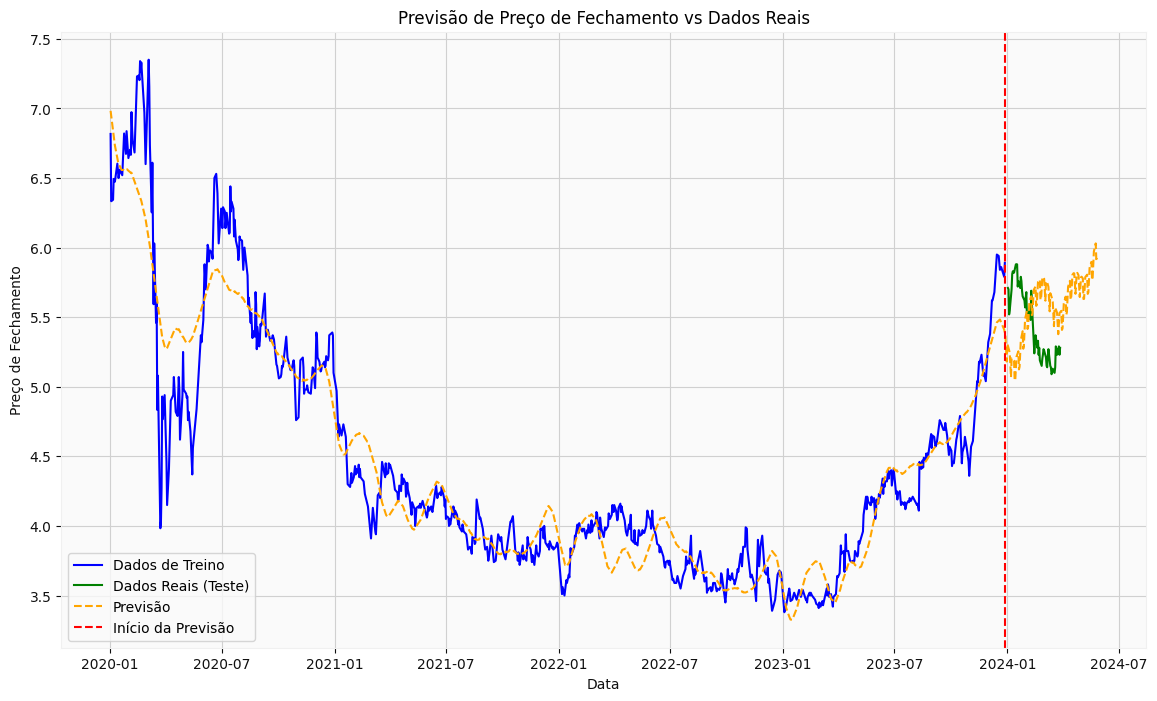

In [ ]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()